## Initializing the libraries

In [59]:
import os
import json
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Class to load data from the file and return the model accepected dataset

In [2]:
# Question answering dataloader class
class F21MPQADataLoader:
    # parameterized constructor received file name and the directory
    def __init__(self, fileName, directory) -> None:
        self.fileName = fileName
        self.directory = directory

    def get_dataset_filename(self) -> None:
        return self.fileName

    def get_dataset_directory(self) -> None:
        return self.directory

    def load_dataset_squad_format(self) -> None:
        # create dataset folder if not exists
        if not os.path.exists(self.directory):
            os.mkdir(self.directory)
        else:
            try:
                with open(os.path.join(self.directory, self.fileName), "rb") as f:
                    return self.__format_transformerbased_QAC(json.load(f))
            except Exception as e:
                print("Oops!", e.__class__, "occurred.")
            finally:
                f.close()

    def __format_transformerbased_QAC(self, jsonData) -> None:
        # initialize list where we will place all of our data
        new_squad = []
        # we need to loop through groups -> paragraphs -> qa_pairs
        for group in jsonData["data"]:
            for paragraph in group["paragraphs"]:
                # we pull out the context from here
                context = paragraph["context"]
                for qa_pair in paragraph["qas"]:
                    # we pull out the question
                    question = qa_pair["question"]
                    # now the logic to check if we have 'answers' or 'plausible_answers'
                    if "answers" in qa_pair.keys() and len(qa_pair["answers"]) > 0:
                        answer = qa_pair["answers"][0]["text"]
                    else:
                        # this shouldn't happen, but just in case we just set answer = None
                        answer = None
                    # append dictionary sample to parsed squad
                    new_squad.append(
                        {"question": question, "answer": answer, "context": context}
                    )
        return new_squad

## Data Loading

In [76]:
import json
from pprint import pprint

IN_PATH = 'data/f21mp/'

def load_fulldataset(filename):
    data = []
    with open(filename) as f:
        data = json.load(f)  
        
    return data

def read_dataset(path):
    with open(path, 'rb') as f:
        squad_dict = json.load(f)

    # initialize lists for contexts, questions, and answers
    contexts = []
    questions = []
    answers = []
    # iterate through all data in squad data
    for group in squad_dict['data']:
        for passage in group['paragraphs']:
            context = passage['context']
            for qa in passage['qas']:
                question = qa['question']
                if 'plausible_answers' in qa.keys():
                    access = 'plausible_answers'
                else:
                    access = 'answers'
                for answer in qa['answers']:
                    # append data to lists
                    contexts.append(context)
                    questions.append(question)
                    answers.append(answer)
    # return formatted data lists
    return contexts, questions, answers

def construct_text(text):
    summary=''
    for t in text:
        if isinstance(t, dict):
            summary +=' '+ ''.join(t['text'])
        else:
            summary +=' '+ ''.join(t)
    return summary
    
def plot_wordcloud(text, ax, title=None):
    wordcloud = WordCloud(max_font_size=None, background_color='white',
                          width=1200, height=1000).generate(text)
    ax.imshow(wordcloud, interpolation="bilinear")
    if title is not None:
        ax.set_title(title)
    ax.axis("off")

def plot_histogram(train_questions,train_contexts,train_answers,barcolor):
    train_question_length = [len(question) for question in train_questions]
    train_context_length  = [len(context) for context in train_contexts] 
    train_answer_length   = [len(answers['text']) for answers in train_answers]
    
    fig, ax = plt.subplots(1,3, figsize=(16, 6))
    ax[0].hist(np.array(train_question_length), bins=12, alpha = 0.5,color=barcolor, edgecolor='gray',linewidth=1)
    ax[1].hist(np.array(train_context_length), bins=12, alpha = 0.5,color=barcolor, edgecolor='gray',linewidth=1)
    ax[2].hist(np.array(train_answer_length), bins=12, alpha = 0.5, color=barcolor, edgecolor='gray',linewidth=1)
    ax[0].title.set_text("Questions")
    ax[1].title.set_text("Contexts")
    ax[2].title.set_text("Answers")

train = load_fulldataset(IN_PATH + 'f21mp_train.json')
dev = load_fulldataset(IN_PATH + 'f21mp_test.json')

## Structure of the loaded data

### A general overview of how the data is organised. The structure of train and dev sets is the same. I'm going to play with the train set here.

In [58]:
print(type(train))

<class 'dict'>


In [38]:
print(train.keys())

dict_keys(['version', 'data'])


In [39]:
print(train['version'])

v1.0


In [40]:
print(type(train['data']))
print(len(train['data']))

<class 'list'>
7


In [31]:
print(type(train['data'][0]))
print(dir(train['data'][0]))

<class 'dict'>
['__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'clear', 'copy', 'fromkeys', 'get', 'items', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values']


In [32]:
print(train['data'][0].keys())

dict_keys(['title', 'paragraphs'])


### Let's try out the first item from the train set. An article has a title and a few paragraphs.

In [33]:
paragraphs = train['data'][0]['paragraphs']
title = train['data'][0]['title']
print('First article')
print('Title: {}'.format(title))
print('Paragraphs[0]: {}'.format(paragraphs[0]))

First article
Title: Laundry
Paragraphs[0]: {'qas': [{'question': 'How long it will take for express laundry?', 'id': 'b7777aede49c11eb859e000d3af01b7f', 'answers': [{'text': '5 hours', 'answer_start': 58}], 'is_impossible': False}, {'question': 'Is there any additional charges for express laundry?', 'id': 'c050e7a4e49c11eb8e93000d3af01b7f', 'answers': [{'text': '50%', 'answer_start': 91}], 'is_impossible': False}, {'question': 'Does the additional charges for all items?', 'id': 'c501cd99e49c11ebadd4000d3af01b7f', 'answers': [{'text': 'Each item', 'answer_start': 67}], 'is_impossible': False}], 'context': 'Our Express laundry service will return your items within 5 hours. Each item is subject to 50% additional charge.'}


In [34]:
print(type(paragraphs[0]))
print(paragraphs[0].keys())

<class 'dict'>
dict_keys(['qas', 'context'])


In [35]:
print(type(paragraphs[0]['qas']))
print(len(paragraphs[0]['qas']))
print(paragraphs[0]['qas'][0])
print(type(paragraphs[0]['qas'][0]))
print(type(paragraphs[0]['qas'][0]['answers']))

<class 'list'>
3
{'question': 'How long it will take for express laundry?', 'id': 'b7777aede49c11eb859e000d3af01b7f', 'answers': [{'text': '5 hours', 'answer_start': 58}], 'is_impossible': False}
<class 'dict'>
<class 'list'>


## Model 

##       dataset   
            (dict)   
            /    \  
           /      \  
      'version'   'data'
      (string)    (list)
                  # each element in the list represents an article (dict)  
                     |
                     |
                  articles
                   (dict)
                   /    \
                  /      \
             'title'   'paragraphs'  
             (string)     (list)
                          # each element in the list is an dict with 'qas' and 'context' keys
                             |
                             |
                            pair
                           (dict)
                          /      \
                         /        \
                        /          \
                       /            \
                 'context'          'qas'
                 (string)           (list)
                  # context of      # each element in the list is a dict with 3 keys
                    the questions      |
                    and answers        |
                                       |
                                 question-answer
                                     (dict)
                                    /   |   \
                                   /    |    \
                                  /     |     \
                               'id' 'question' 'answers'
                             (string)(string)   (list)
                                                # each element in the list is an answer dict with 
                                                'text' of the answer and 'answer_start'
                                                  |
                                                  |
                                                answer
                                                (dict)
                                                /     \
                                               /       \
                                        'answer_start' 'text'
                                            (int)     (string)

In [4]:
train_contexts, train_questions, train_answers = read_dataset(IN_PATH+'f21mp_train.json')
val_contexts, val_questions, val_answers = read_dataset(IN_PATH+'f21mp_test.json')

Training data Word Cloud


<ipython-input-5-13baf51ca7a7>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


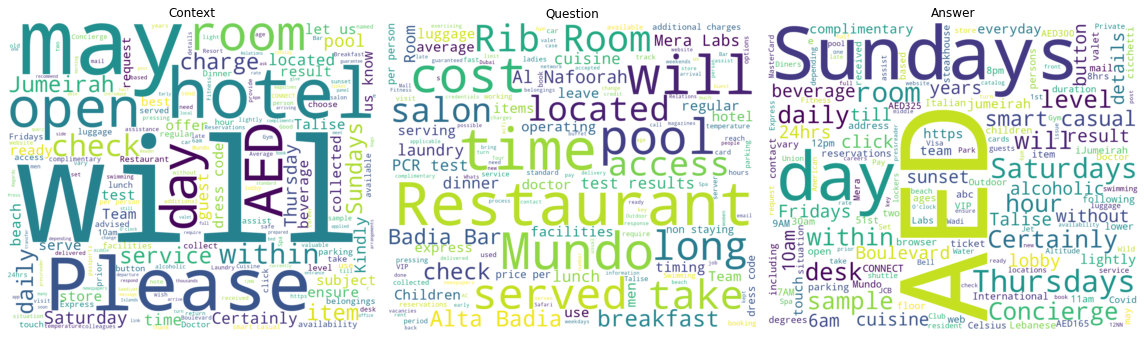

In [5]:
print('Training data Word Cloud')
fig, axes = plt.subplots(1, 3, figsize=(16, 18))
plot_wordcloud(construct_text(set(train_contexts)), axes[0], 'Context')
plot_wordcloud(construct_text(set(train_questions)), axes[1], 'Question')
plot_wordcloud(construct_text(train_answers), axes[2], 'Answer')

plt.tight_layout()
fig.show()

Validation data Word Cloud


<ipython-input-6-e47538766663>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


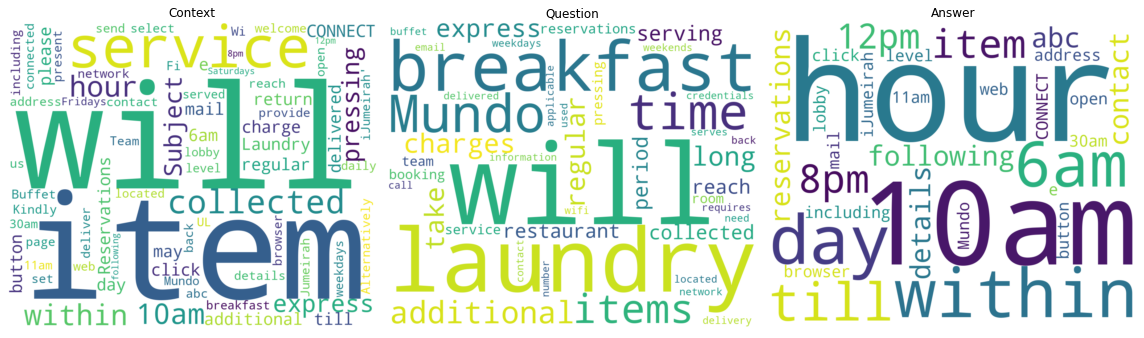

In [6]:
print('Validation data Word Cloud')
fig, axes = plt.subplots(1, 3, figsize=(16, 18))
plot_wordcloud(construct_text(set(val_contexts)), axes[0], 'Context')
plot_wordcloud(construct_text(set(val_questions)), axes[1], 'Question')
plot_wordcloud(construct_text(val_answers), axes[2], 'Answer')

plt.tight_layout()
fig.show()

Analyzing the length of train dataset


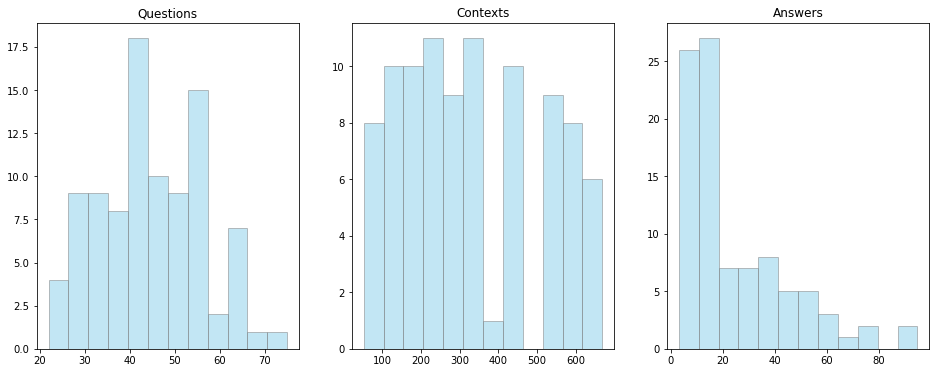

In [83]:
print('Analyzing the length of train dataset')
plot_histogram(train_questions,train_contexts,train_answers,'skyblue')

Analyzing the length of validation dataset


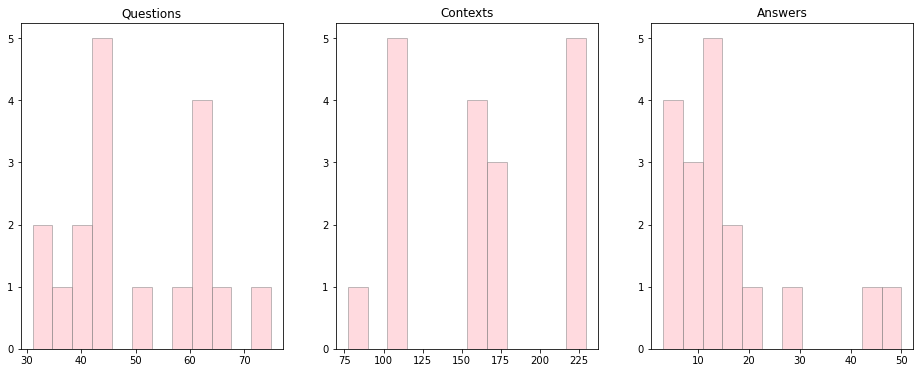

In [84]:
print('Analyzing the length of validation dataset')
plot_histogram(val_questions,val_contexts,val_answers,'lightpink')